In [1]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35337, done.
remote: Counting objects: 100% (3914/3914), done.
remote: Compressing objects: 100% (1670/1670), done.
remote: Total 35337 (delta 2680), reused 3309 (delta 2226), pack-reused 31423
Receiving objects: 100% (35337/35337), 29.71 MiB | 27.78 MiB/s, done.
Resolving deltas: 100% (25439/25439), done.


In [2]:
%cd ./ultralytics

/content/ultralytics


In [3]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)

In [4]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00


In [5]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA L4)


In [8]:
data_dir = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803'
data_yaml = '/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/data.yaml'

In [11]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'names': ['beaf',
  'bellpepper',
  'carrot',
  'chicken',
  'chili',
  'cucumber',
  'egg',
  'eggplant',
  'fish',
  'garlic',
  'green_onion',
  'kimchi',
  'koreancabbage',
  'lettuce',
  'mungbeansprout',
  'mushroom',
  'onion',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'sausage',
  'shrimp',
  'squid',
  'tofu',
  'tomato',
  'bab',
  'bean_sprouts',
  'bread',
  'cut_mackerel',
  'fishcake',
  'garlic_clove',
  'ginger',
  'mackerel',
  'perilla',
  'sweet_potato'],
 'nc': 36,
 'roboflow': {'license': 'CC BY 4.0',
  'project': 'food-ingredients-ftnpv',
  'url': 'https://universe.roboflow.com/data-orccx/food-ingredients-ftnpv/dataset/4',
  'version': 4,
  'workspace': 'data-orccx'},
 'test': '../test/images',
 'train': '../train/images',
 'val': '../valid/images'}

In [12]:
from ultralytics import YOLO

In [13]:
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0806'
os.makedirs(checkpoint_dir, exist_ok=True)
import shutil

In [14]:
# 7월 4일자 최선의 성능을 지닌 모델로 추가학습 및 추론해보기
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0704'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=50, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/0704/best.pt, data=/content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fa

100%|██████████| 755k/755k [00:00<00:00, 31.7MB/s]


Overriding model.yaml nc=166 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralyti

100%|██████████| 6.25M/6.25M [00:00<00:00, 120MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/train/labels... 49297 images, 2554 backgrounds, 0 corrupt: 100%|██████████| 51842/51842 [1:13:46<00:00, 11.71it/s]


train: New cache created: /content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 87, len(boxes) = 121344. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
train: 86.9GB RAM required to cache images with 50% safety margin but only 49.4/53.0GB available, not caching images ⚠️
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/valid/labels... 2200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2200/2200 [02:10<00:00, 16.91it/s]


val: New cache created: /content/drive/MyDrive/DAB/Data_Food_Ingredients_0803/valid/labels.cache


val: Caching images (2.5GB RAM): 100%|██████████| 2200/2200 [00:06<00:00, 336.16it/s]


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.41G     0.9952      2.094      1.371         12        640: 100%|██████████| 1621/1621 [05:32<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:11<00:00,  2.93it/s]

                   all       2200       5368      0.687      0.679      0.707      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.41G     0.9624      1.336      1.338         21        640: 100%|██████████| 1621/1621 [05:18<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]


                   all       2200       5368      0.718      0.714      0.758      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.37G     0.9899      1.229      1.356         14        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]


                   all       2200       5368      0.735      0.651      0.726        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.62G       1.03      1.219      1.389          3        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]


                   all       2200       5368      0.737        0.7      0.744      0.513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.75G      1.008      1.157      1.379          7        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.704      0.702      0.751      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.21G      0.997       1.13      1.372         10        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]


                   all       2200       5368      0.774      0.703      0.786      0.553

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.2G     0.9837      1.091      1.365          7        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.758      0.746      0.801      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.16G      0.968      1.065      1.354          2        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]

                   all       2200       5368      0.803      0.726       0.81      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.48G     0.9586      1.046      1.347          9        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.793      0.784      0.836      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.28G     0.9499      1.022      1.341         19        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.816      0.763      0.834      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.68G     0.9379      1.005      1.333         11        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.833      0.775      0.847      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.67G      0.935     0.9877      1.329          6        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.802      0.792      0.847      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.23G     0.9274     0.9771      1.326          8        640: 100%|██████████| 1621/1621 [05:09<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.836      0.771      0.849      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       5.2G     0.9215     0.9603       1.32          7        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]

                   all       2200       5368      0.839      0.792       0.86      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.49G     0.9128     0.9513      1.316          7        640: 100%|██████████| 1621/1621 [05:09<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368       0.85      0.795      0.865      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50       5.9G     0.9089      0.943      1.312         13        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]

                   all       2200       5368      0.855      0.794      0.873      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.13G     0.9026     0.9303      1.309          6        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.833      0.809      0.872      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.99G     0.8987     0.9213      1.305         15        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.822      0.818      0.873      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.47G     0.8896     0.9091      1.298         10        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all       2200       5368       0.83      0.817      0.874      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.39G     0.8826     0.8978      1.293         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]

                   all       2200       5368      0.816      0.829      0.875      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.91G     0.8785     0.8908       1.29          8        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.826      0.827      0.879      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.82G     0.8753     0.8806      1.291          8        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.822      0.825      0.877      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.46G     0.8719     0.8771      1.288         11        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.814      0.831      0.878      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.73G      0.867     0.8685      1.283          7        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.824      0.822      0.878      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.28G     0.8597     0.8576      1.279          9        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all       2200       5368      0.829      0.825       0.88      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.58G     0.8562     0.8467      1.276          5        640: 100%|██████████| 1621/1621 [05:09<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all       2200       5368      0.841      0.817      0.881      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.54G     0.8535     0.8394      1.271         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.838      0.827      0.884      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.62G     0.8477     0.8343      1.269          6        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.841      0.821      0.884      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.58G     0.8434     0.8263      1.265         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]

                   all       2200       5368      0.844       0.82      0.885      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.09G     0.8368     0.8165      1.262          8        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.837      0.819      0.884       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.87G     0.8323      0.813      1.258          6        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all       2200       5368      0.841      0.817      0.886      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.42G     0.8214     0.7944      1.252          4        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.833      0.823      0.885      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.37G     0.8229     0.7976      1.252          4        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]

                   all       2200       5368      0.832      0.826      0.885      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.95G      0.817     0.7862      1.248         14        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.844      0.817      0.886      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.45G     0.8109     0.7769      1.244         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.857      0.813      0.886      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50       5.7G     0.8071     0.7706      1.242         10        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.855      0.814      0.887      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.04G     0.7992     0.7588      1.235         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.29it/s]

                   all       2200       5368      0.857      0.817      0.888      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.39G      0.791     0.7502      1.231          8        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.855      0.819      0.889      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       5.2G     0.7867     0.7412      1.228          9        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]

                   all       2200       5368      0.854      0.817      0.889      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.36G     0.7816     0.7385      1.224         12        640: 100%|██████████| 1621/1621 [05:10<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.30it/s]

                   all       2200       5368      0.866      0.817      0.892       0.69


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.16G     0.7261     0.5748      1.227          5        640: 100%|██████████| 1621/1621 [05:07<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.24it/s]

                   all       2200       5368      0.855      0.827      0.892      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.61G     0.7077     0.5495      1.212          6        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.31it/s]

                   all       2200       5368      0.851      0.833      0.893      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.19G     0.6907     0.5317        1.2          5        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.25it/s]

                   all       2200       5368      0.852      0.834      0.894      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.42G     0.6795      0.521      1.189          3        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.857      0.835      0.894      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.99G     0.6678      0.504      1.179          4        640: 100%|██████████| 1621/1621 [05:04<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.861      0.834      0.896      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.13G     0.6568     0.4917      1.171          6        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.865      0.838      0.896      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.05G     0.6444     0.4792      1.161          6        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.28it/s]

                   all       2200       5368      0.865      0.838      0.897      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.86G     0.6343     0.4675      1.154          6        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368      0.867      0.837      0.897      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.22G     0.6242      0.456      1.143          7        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.26it/s]

                   all       2200       5368      0.869      0.837      0.897      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.36G     0.6152     0.4481      1.138          4        640: 100%|██████████| 1621/1621 [05:05<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:10<00:00,  3.27it/s]

                   all       2200       5368       0.87      0.836      0.898      0.703



50 epochs completed in 4.466 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.73 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
Model summary (fused): 168 layers, 3,012,668 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 35/35 [00:13<00:00,  2.63it/s]


                   all       2200       5368       0.87      0.835      0.898      0.703
                  beaf        160        227      0.948      0.903      0.968      0.871
            bellpepper         22        103      0.903      0.757      0.837      0.629
                carrot        236       1070      0.911      0.822      0.909       0.72
               chicken        164        305      0.931      0.941       0.97      0.842
              cucumber        151        366      0.956      0.825      0.915      0.775
                   egg        133        577      0.986      0.987      0.994      0.914
              eggplant        159        337       0.95      0.851      0.948      0.791
                garlic         14         59      0.891      0.692      0.754      0.549
           green_onion        111        137       0.94      0.803      0.912       0.74
                kimchi         10         10      0.695        0.9      0.911      0.705
         koreancabbag

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  5,  6,  7,  9, 10, 11, 12, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ec5313259c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.0

Save & Inference (영빈아 내가 추가했어)

In [15]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train
train_batch64840.jpg
confusion_matrix.png
args.yaml
labels.jpg
R_curve.png
results.csv
labels_correlogram.jpg
val_batch0_labels.jpg
weights
PR_curve.png
F1_curve.png
results.png
train_batch2.jpg
train_batch64842.jpg
train_batch0.jpg
train_batch1.jpg
val_batch1_labels.jpg
confusion_matrix_normalized.png
events.out.tfevents.1722926492.4f099815acb7.701.0
val_batch1_pred.jpg
val_batch2_pred.jpg
val_batch2_labels.jpg
train_batch64841.jpg
val_batch0_pred.jpg
P_curve.png


In [16]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0806/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0806/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/0806/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/0806/last.pt


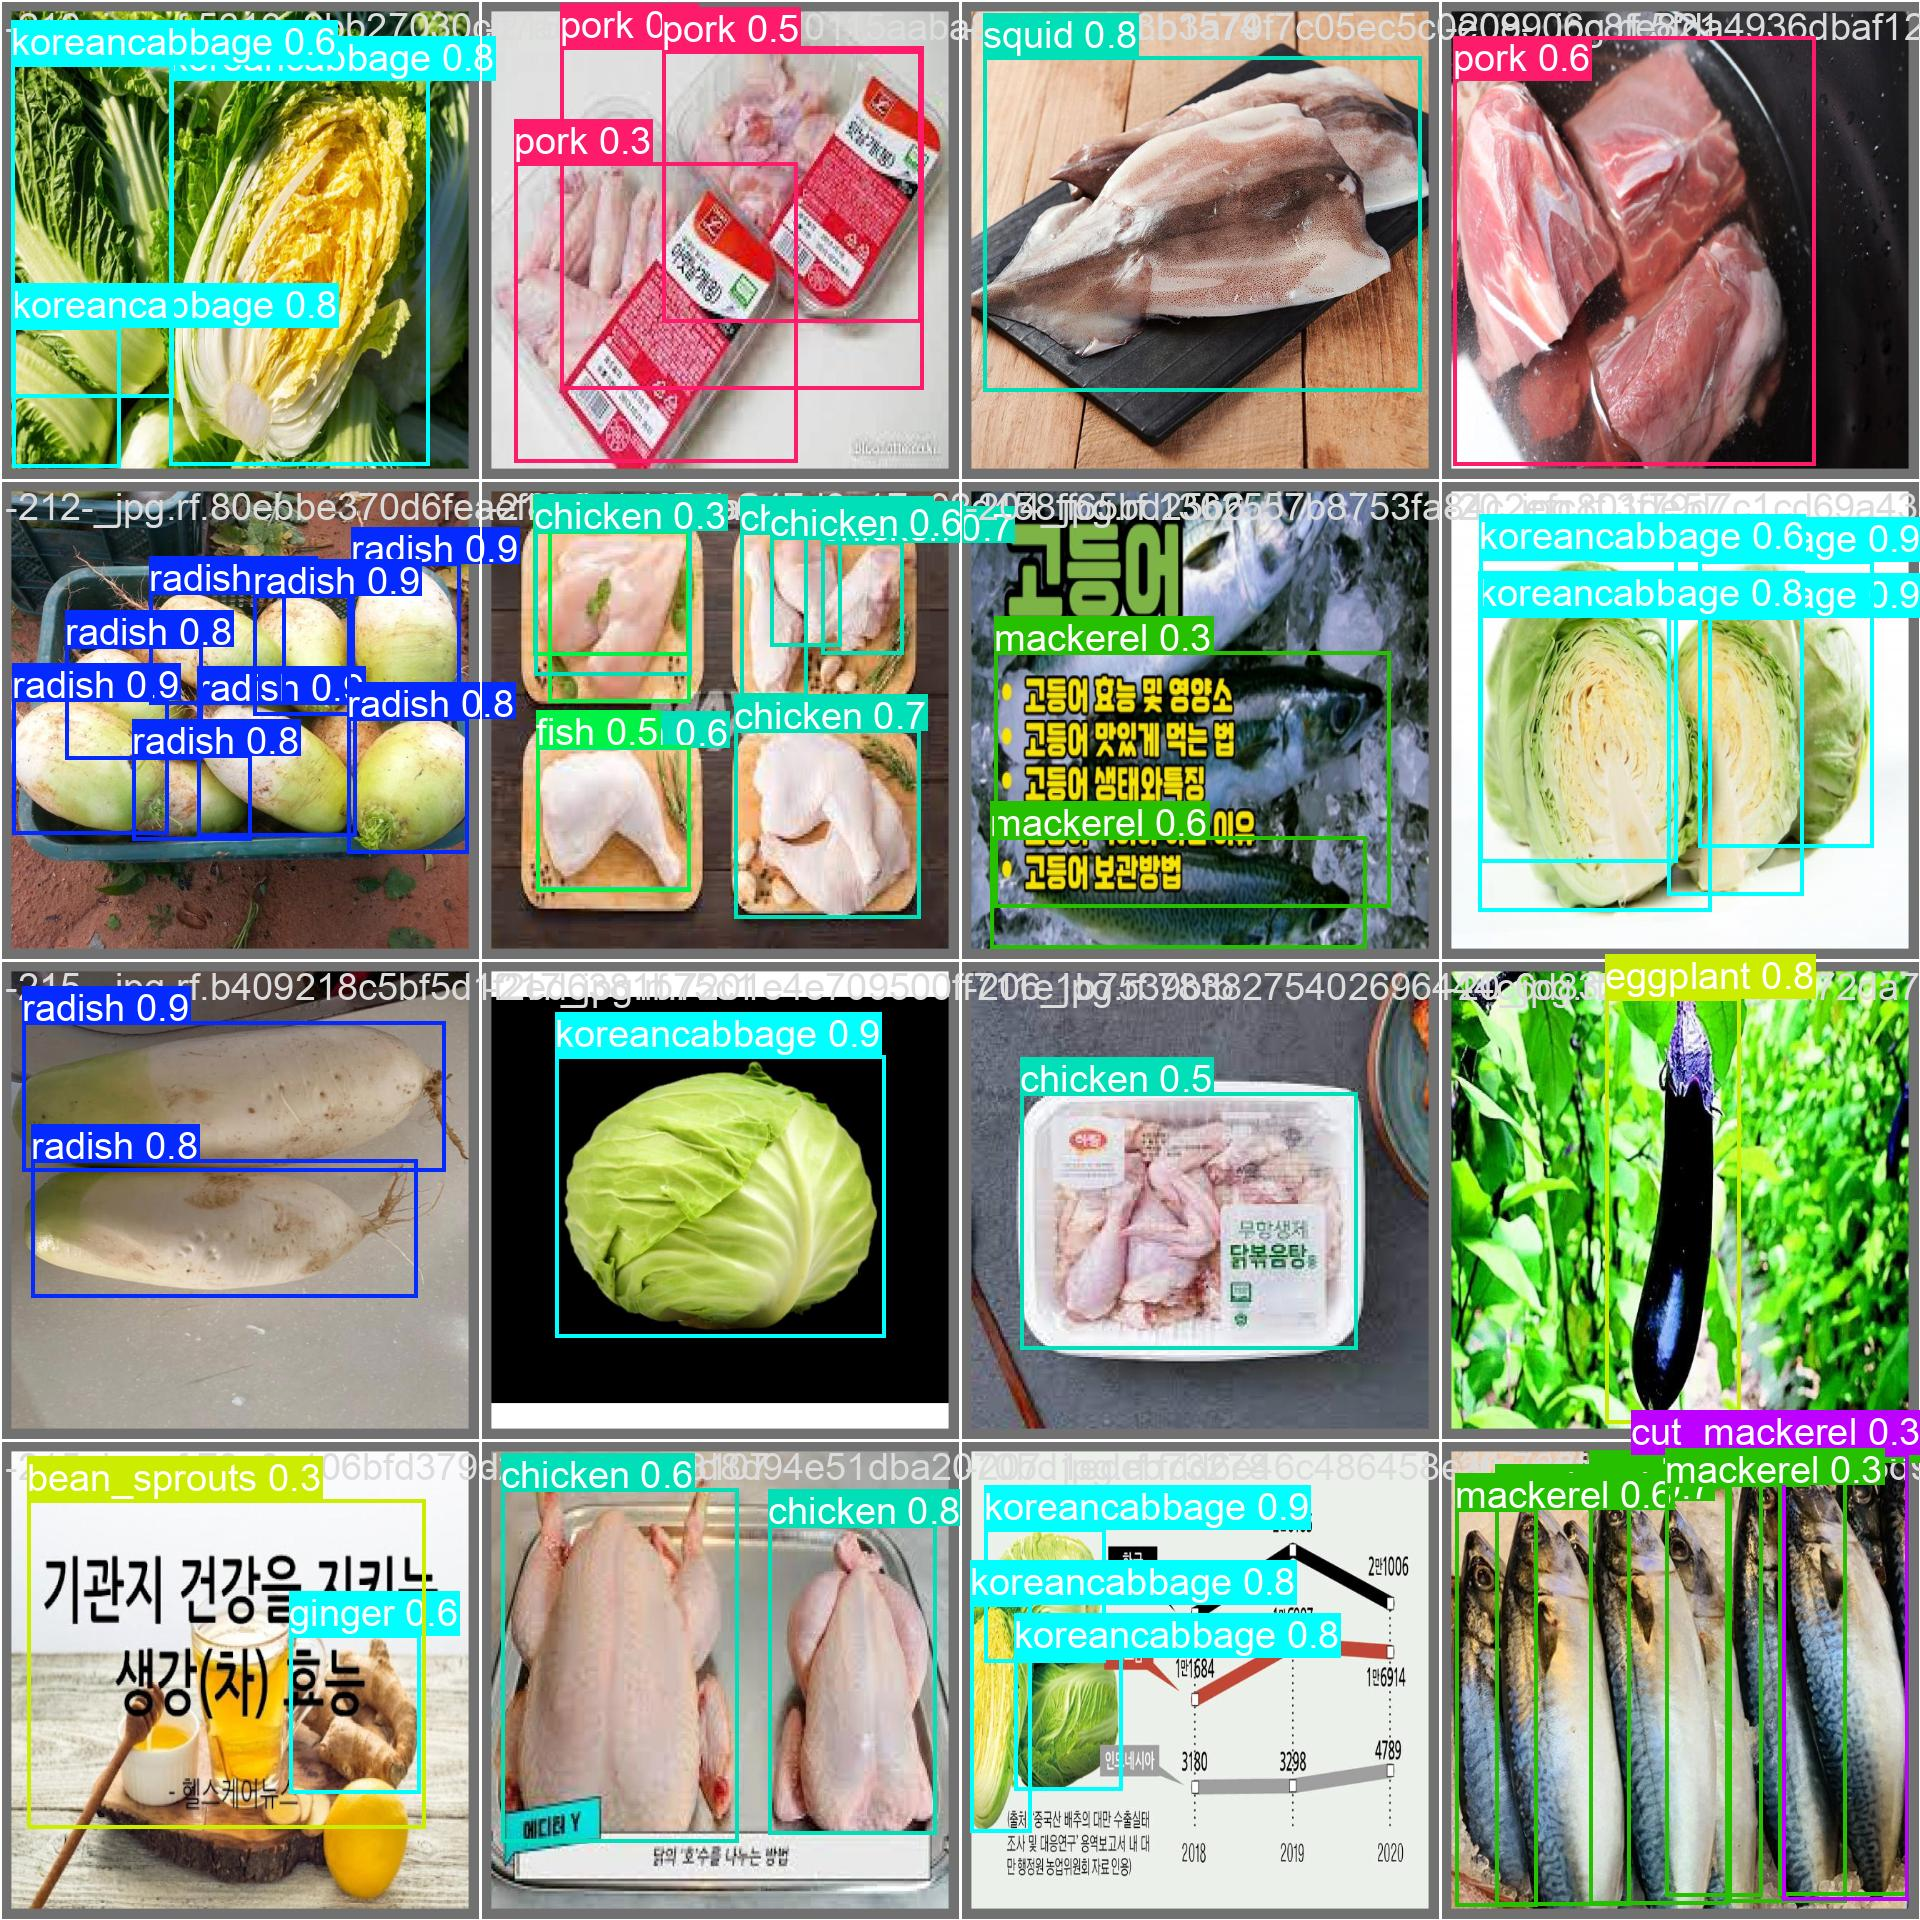

In [17]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train/val_batch1_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp2.jpg: 640x640 2 eggs, 2 garlics, 3 potatos, 7.8ms
Speed: 1.8ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


array([[[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       ...,

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]]], dtype=uint8)
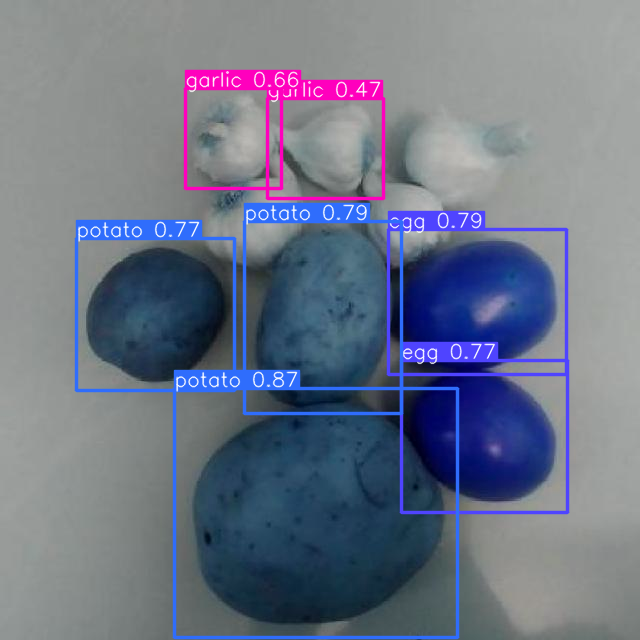

In [23]:
# 처음 마주하는 이미지에 대한 추론 시각화
results = model('/content/drive/MyDrive/DAB/inference_sample/tmp2.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화